In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%config InlineBackend.figure_format = 'retina'

### Задача 
Сказать будет ли завтра дождь или нет.   
#### Описание датасета
Этот набор данных содержит около 10 лет ежедневных наблюдений за погодой с многочисленных австралийских метеостанций.

RainTomorrow - это целевая переменная для прогнозирования. Это значит - шел ли дождь на следующий день, да или нет?
Эта колонка имеет значение "Да", если количество осадков за этот день составило 1 мм или более.
#### Ссылка на датасет:    
Rain in Australia https://www.kaggle.com/jsphyg/weather-dataset-rattle-package

In [2]:
df = pd.read_csv('Dataset/Data.zip')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


| Название      | Описание      | 
| ------------- |:-------------:| 
| Date	        | Дата наблюдения |
| Location      | Общепринятое название местоположения метеостанции | 
| MinTemp	    | Минимальная температура в градусах Цельсия | 
| MaxTemp       | Максимальная температура в градусах Цельсия |
| Rainfall	    | Количество осадков, зафиксированных за день в мм |
| Evaporation	| Так называемое испарение на сковороде класса А (мм) за 24 часа до 9 утра. |
| Sunshine	    | Количество часов солнечного света в день |
| WindGustDir	| Направление сильнейшего порыва ветра за 24 часа до полуночи |
| WindGustSpeed	| Скорость (км / ч) самого сильного порыва ветра за 24 часа до полуночи. |
| WindDir9am	| Направление ветра в 9 утра |
| WindDir3pm    | Направление ветра в 15:00 |
| WindSpeed9am  | Средняя скорость ветра (км / ч) за 10 минут до 9 часов утра |
| WindSpeed3pm  | Скорость ветра (км / ч), усредненная за 10 минут до 15:00 |
| Humidity9am	| Влажность (в процентах) в 9 утра  |
| Humidity3pm	| Влажность (в процентах) в 15:00 |
| Pressure9am	| Атмосферное давление (гПа) снижено до среднего уровня моря в 9 утра |
| Pressure3pm	| Атмосферное давление (гПа) снижено до среднего уровня моря в 15:00 |
| Cloud9am	    | Часть неба, закрытая облаками в 9 утра. Он измеряется в октах, которые составляют восьмые доли. Он записывает, сколько |
| Cloud3pm	    | Часть неба, закрытая облаками (в «октах»: восьмые) в 15:00. См. Описание значений в Cload9am |
| Temp9am	    | Температура (градусы С) в 9 утра |
| Temp3pm	    | Температура (градусы C) в 15:00 |
| RainToday	    | 1, если количество осадков (мм) за 24 часа до 9 утра превышает 1 мм, в противном случае - 0 |
| RainTomorrow  | 1, если количество осадков (мм) за 24 часа до 9 утра превышает 1 мм, в противном случае - 0  |

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### Зависимость между количеством солнечного света за день и выпадением осадков завтра

In [5]:
df.pivot_table(values=['Sunshine'], index=['RainTomorrow'], aggfunc='mean')

,Sunshine
RainTomorrow,
No,8.546358
Yes,4.471761


<AxesSubplot:xlabel='RainTomorrow', ylabel='Sunshine'>

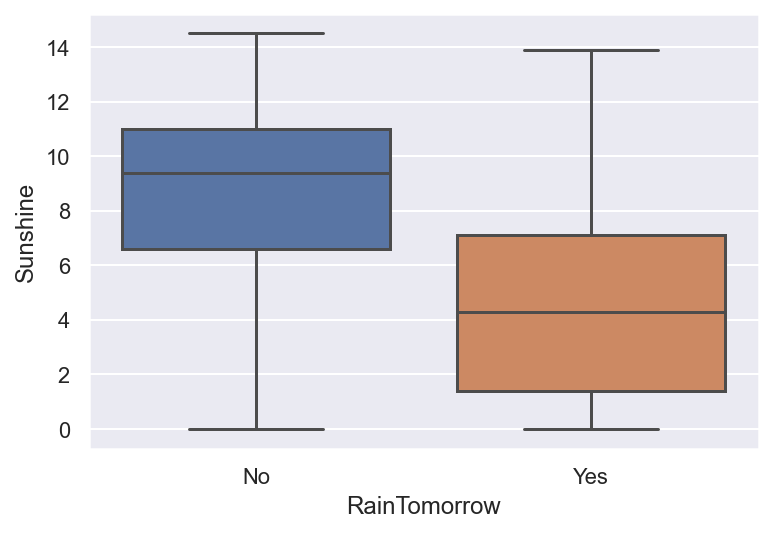

In [6]:
sns.boxplot(df['RainTomorrow'], df['Sunshine'])

mean =  4.471761488615419
std =  3.359328916222063


<AxesSubplot:>

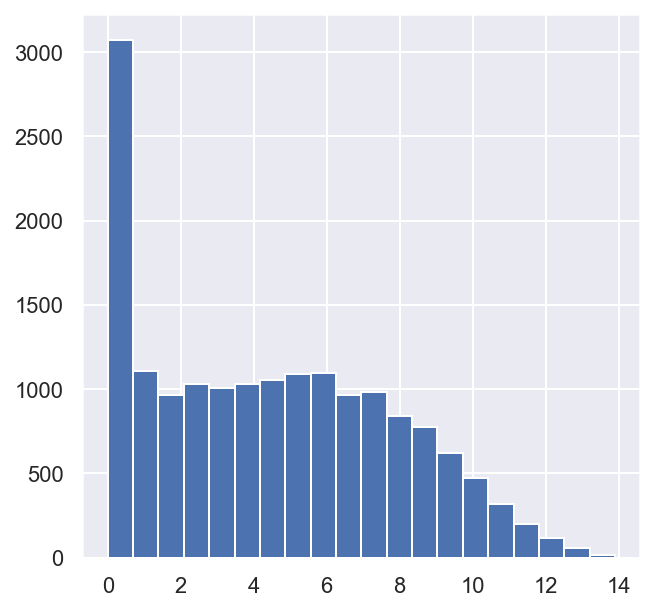

In [7]:
RainTomorrow_y = df[df['RainTomorrow']=='Yes']
print('mean = ', RainTomorrow_y['Sunshine'].mean())
print('std = ', RainTomorrow_y['Sunshine'].std())
RainTomorrow_y['Sunshine'].hist(bins=20,figsize=(5, 5))

mean =  8.54635832927938
std =  3.3802981958292193


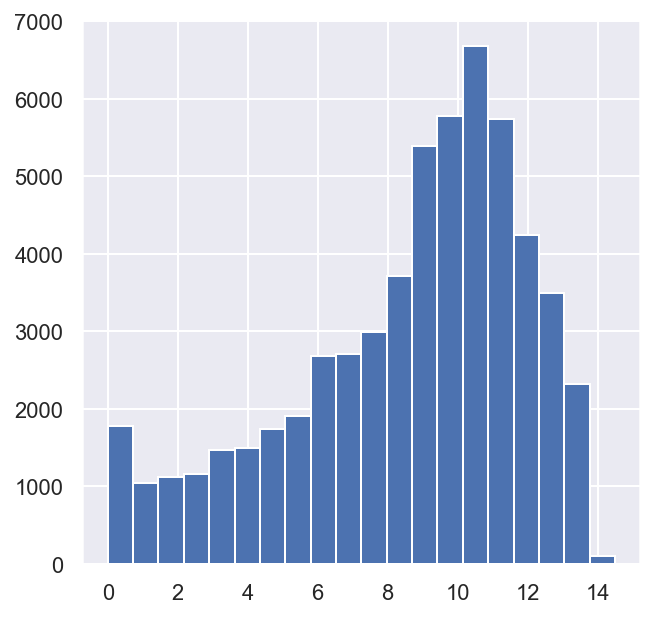

In [8]:
RainTomorrow_n = df[df['RainTomorrow']=='No']
print('mean = ', RainTomorrow_n['Sunshine'].mean())
print('std = ', RainTomorrow_n['Sunshine'].std())
RainTomorrow_n['Sunshine'].hist(bins=20,figsize=(5, 5));

Из приведенных выше графиков мы можем сделать вывод о том, что вероятность дождя завтра тем больше, чем меньше солнечных часов.
В среднем дождь вероятно будет завтра если сегодня солнечных менее 7ми. 

##### Зависимость между влажностью и выпадением осадков завтра

In [9]:
df.pivot_table(values=['Humidity9am'], index=['RainTomorrow'], aggfunc='mean')

,Humidity9am
RainTomorrow,
No,66.217573
Yes,77.983314


<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity9am'>

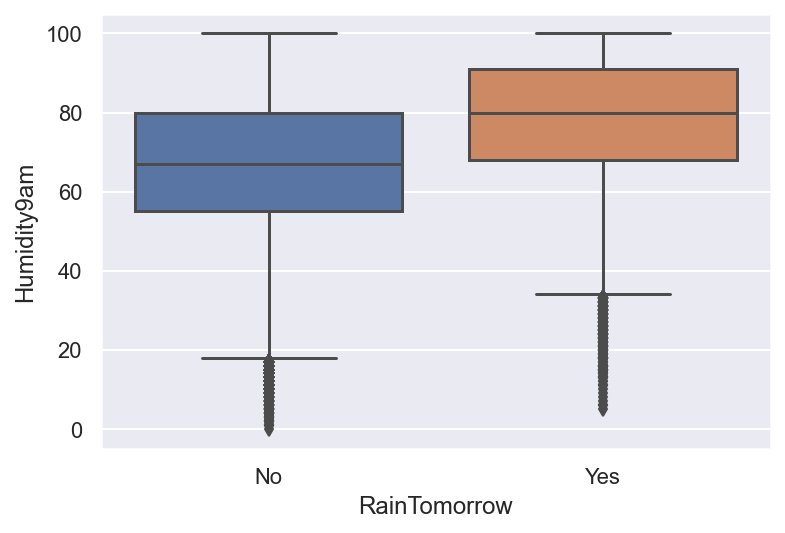

In [10]:
sns.boxplot(df['RainTomorrow'], df['Humidity9am'])

In [11]:
df.pivot_table(values=['Humidity3pm'], index=['RainTomorrow'], aggfunc='mean')

,Humidity3pm
RainTomorrow,
No,46.510625
Yes,68.800019


<AxesSubplot:xlabel='RainTomorrow', ylabel='Humidity3pm'>

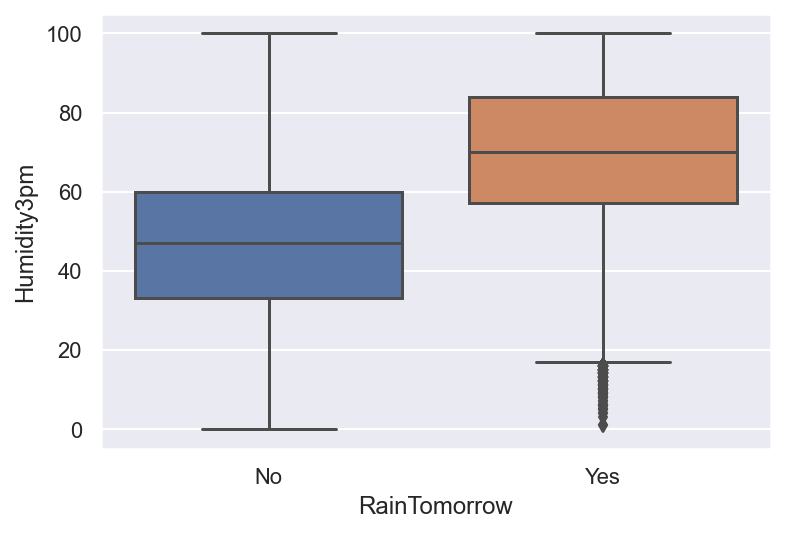

In [13]:
sns.boxplot(df['RainTomorrow'], df['Humidity3pm'])

Вероятность дождя завтра больше зависит от влажности в 3 часа дня.

mean =  68.80001940931
std =  19.037408791330805


<AxesSubplot:>

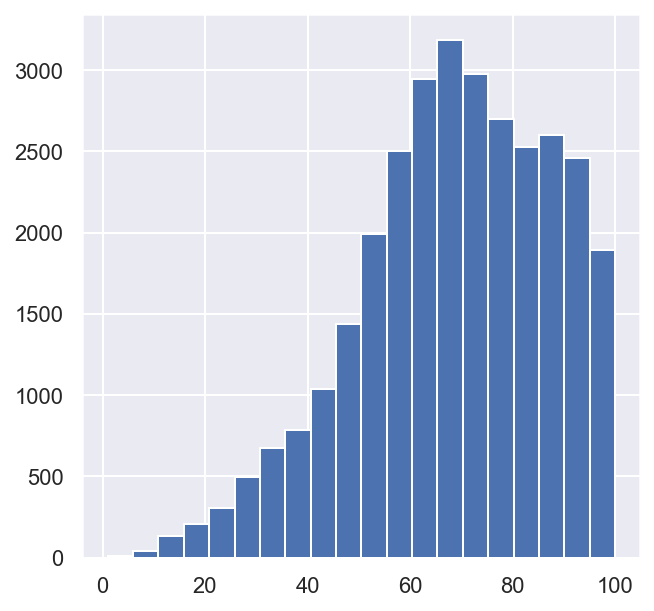

In [14]:
RainTomorrow_y = df[df['RainTomorrow']=='Yes']
print('mean = ', RainTomorrow_y['Humidity3pm'].mean())
print('std = ', RainTomorrow_y['Humidity3pm'].std())
RainTomorrow_y['Humidity3pm'].hist(bins=20,figsize=(5, 5))

mean =  46.51062505804774
std =  18.489475795722612


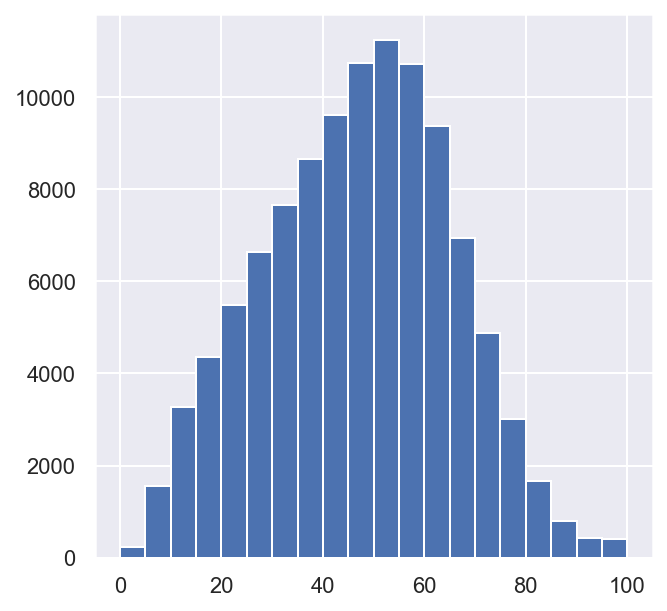

In [15]:
RainTomorrow_n = df[df['RainTomorrow']=='No']
print('mean = ', RainTomorrow_n['Humidity3pm'].mean())
print('std = ', RainTomorrow_n['Humidity3pm'].std())
RainTomorrow_n['Humidity3pm'].hist(bins=20,figsize=(5, 5));

С повышением влажности возрастает вероятность выпадения осадков завтра.

##### Зависимость между облачностью и выпадением осадков завтра

In [16]:
df.pivot_table(values=['Cloud9am'], index=['RainTomorrow'], aggfunc='mean')

,Cloud9am
RainTomorrow,
No,3.932282
Yes,6.099990


<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud9am'>

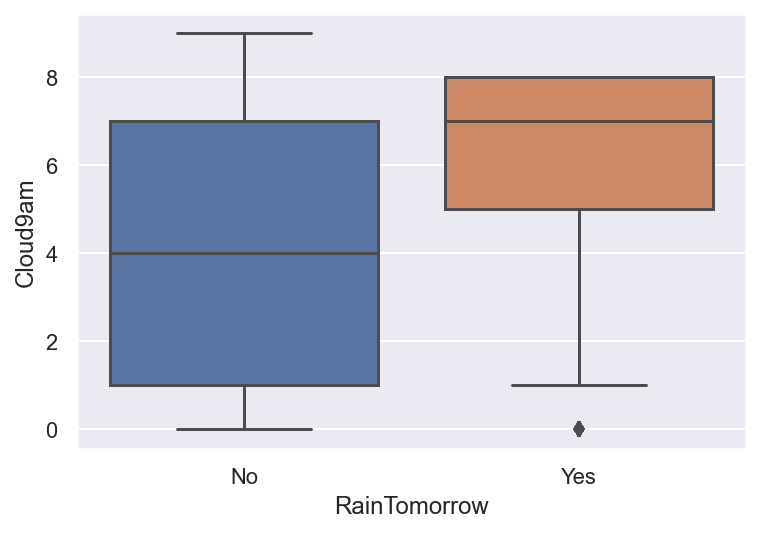

In [17]:
sns.boxplot(df['RainTomorrow'], df['Cloud9am'])

In [18]:
df.pivot_table(values=['Cloud3pm'], index=['RainTomorrow'], aggfunc='mean')

,Cloud3pm
RainTomorrow,
No,3.921896
Yes,6.360065


<AxesSubplot:xlabel='RainTomorrow', ylabel='Cloud3pm'>

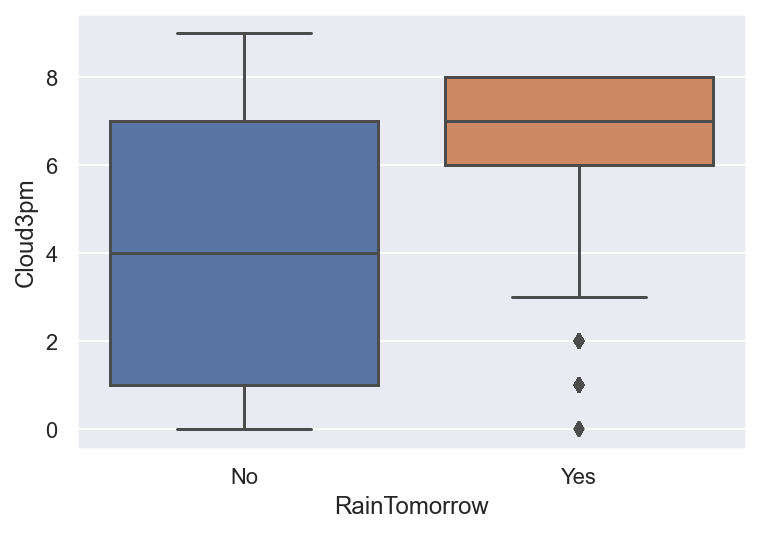

In [19]:
sns.boxplot(df['RainTomorrow'], df['Cloud3pm'])

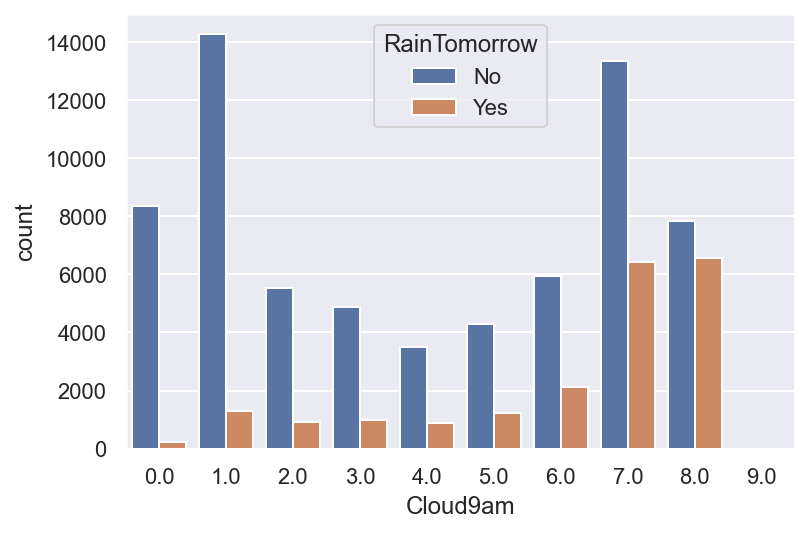

In [20]:
sns.countplot(x='Cloud9am', hue='RainTomorrow', data=df);

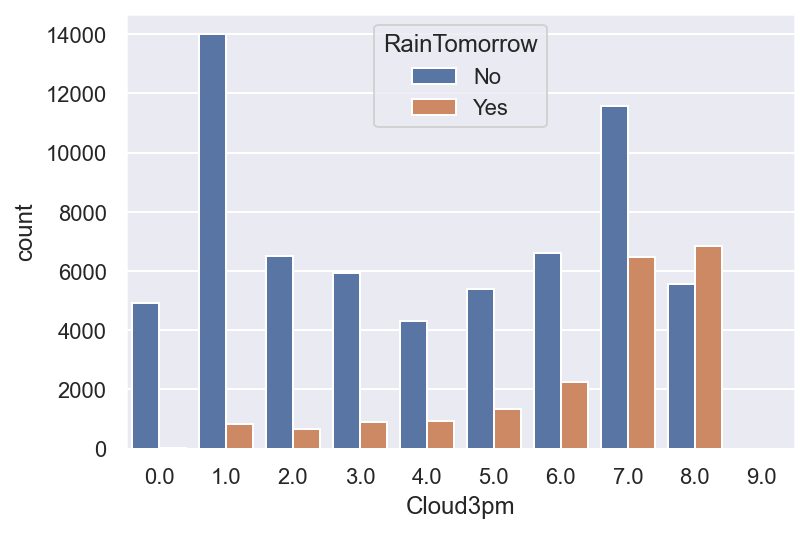

In [21]:
sns.countplot(x='Cloud3pm', hue='RainTomorrow', data=df);

Вероятность выпадения осадков возрастает с показателем облачности. В последнем графике видно, что если значение Cloud3pm = 8, то вероятность дождя завтра больше чем его отсутсвия. 

##### Зависимость между количеством осадков сегоня и выпадением осадков завтра

Находим среднее значение количества осадков

In [22]:
df['Rainfall'].mean()

2.360918149917032

In [23]:
Rainfall_more_mean = df[df['Rainfall'] >= 2.35326]
len(Rainfall_more_mean)

24575

Находим сколько процентов RainTomorrow = Yes при Rainfall больше либо равному среднему значению

In [24]:
print(int(round(Rainfall_more_mean[Rainfall_more_mean['RainTomorrow'] == 'Yes'
                           ].RainToday.count() / len(Rainfall_more_mean) * 100)), '%')

49 %


<AxesSubplot:>

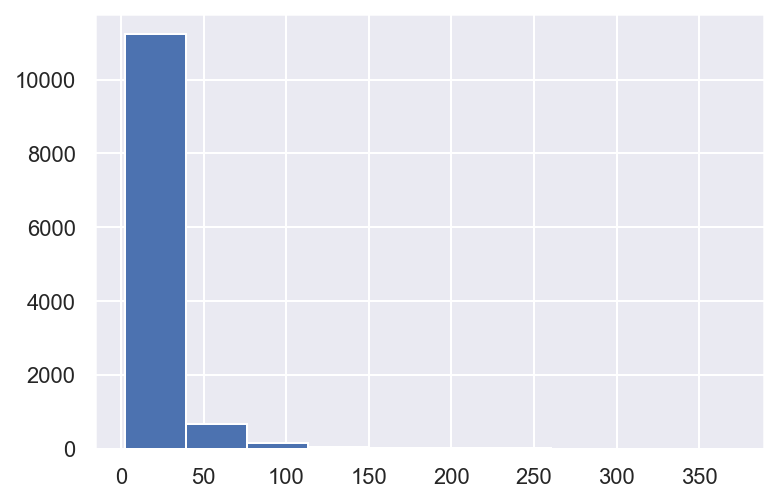

In [25]:
Rainfall_more_mean[Rainfall_more_mean['RainTomorrow'] == 'Yes'].Rainfall.hist()

In [26]:
Rainfall_less_mean = df[df['Rainfall'] < 2.35326]
len(Rainfall_less_mean)

117624

In [27]:
print(int(round(Rainfall_less_mean[Rainfall_less_mean['RainTomorrow'] == 'Yes'
                           ].RainToday.count() / len(Rainfall_less_mean) * 100)), '%')

16 %


In [28]:
Rainfall_more_5 = df[df['Rainfall'] >= 5]
len(Rainfall_more_5)

16561

In [29]:
print(int(round(Rainfall_more_5[Rainfall_more_5['RainTomorrow'] == 'Yes'
                           ].RainToday.count() / len(Rainfall_more_5) * 100)), '%')

54 %


In [30]:
Rainfall_more_10 = df[df['Rainfall'] >= 10]
len(Rainfall_more_10)

9455

In [31]:
print(int(round(Rainfall_more_10[Rainfall_more_10['RainTomorrow'] == 'Yes'
                           ].RainToday.count() / len(Rainfall_more_10) * 100)), '%')

58 %


In [32]:
Rainfall_more_50 = df[df['Rainfall'] >= 50]
len(Rainfall_more_50)

808

In [33]:
print(int(round(Rainfall_more_50[Rainfall_more_50['RainTomorrow'] == 'Yes'
                           ].RainToday.count() / len(Rainfall_more_50) * 100)), '%')

73 %


In [34]:
Rainfall_more_100 = df[df['Rainfall'] >= 100]
len(Rainfall_more_100)

151

In [35]:
print(int(round(Rainfall_more_100[Rainfall_more_100['RainTomorrow'] == 'Yes'
                           ].RainToday.count() / len(Rainfall_more_100) * 100)), '%')

74 %


С увеличением количества выпавших осадков увеличевается и вероятность дождя завтра, однако при заначении Rainfall > 50 увеличивается не значительно.

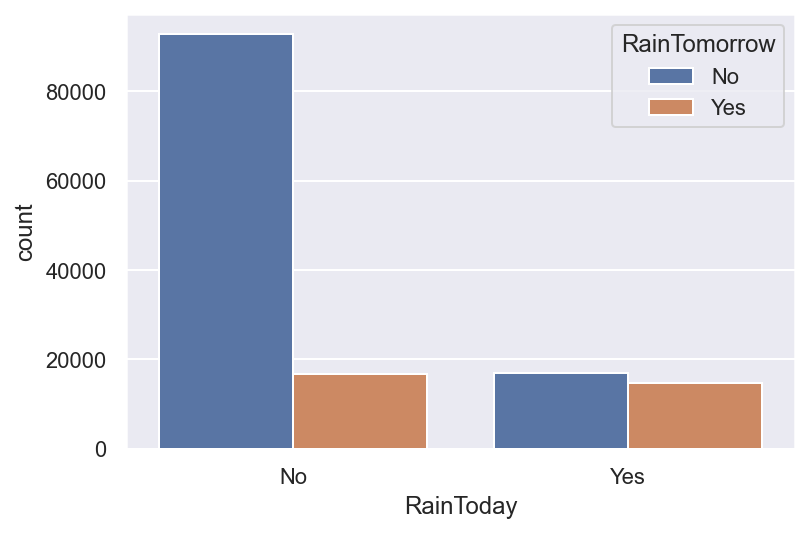

In [36]:
sns.countplot(x='RainToday', hue='RainTomorrow', data=df);

Если сегодня не было дождя, то велика вероятность, что его не будет завтра. Если же дождь сегодня был, то вероятность выпадения осадков завтра примерно равна(вероятность того, что дождя завтра не будет немного больше).

Уберём столбцы Date, Location, WindGustSpeed , WindSpeed9am, WindSpeed3pm, WindGustDir, WindDir9am, WindDir3pm - не имеют сильного влияния на RainTomorrow. Во многих столбцах присутствуют пропущенные значения, заменим их самым часто встречающимся значением. Также в столбцах RainToday и RainTomorrow заменим No на 0, Yes на 1. 

In [37]:
df1 = df.drop(['Date','Location','WindGustSpeed','WindSpeed9am',
               'WindSpeed3pm','WindGustDir','WindDir9am','WindDir3pm'], axis = 1)

In [38]:
df1['RainToday'] = df1['RainToday'].map({'No' : 0, 'Yes' : 1})

In [39]:
df1['RainTomorrow'] = df1['RainTomorrow'].map({'No' : 0, 'Yes' : 1})

Матрица корреляции:

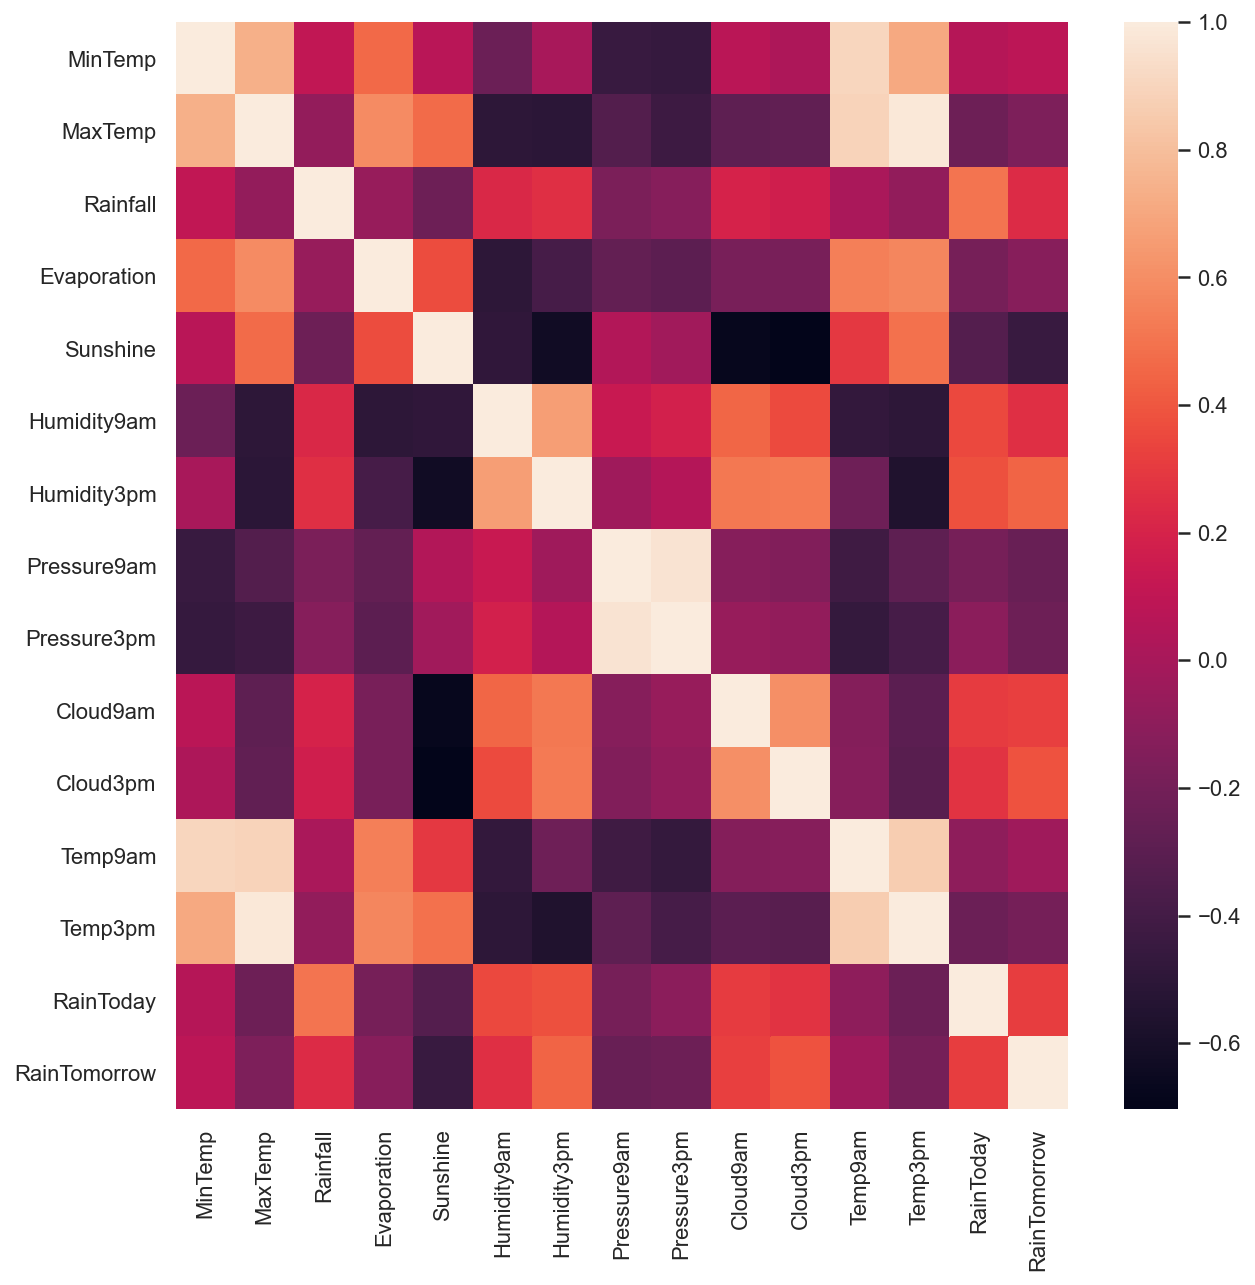

In [40]:
plt.figure(figsize=(10, 10))
sns.heatmap(df1.corr());